In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

## Gộp 2 nguồn dữ liệu LLM + Social

In [34]:
df_llm = pd.read_json("cleaned_data.json")
df_social = pd.read_json("data_social.json")

In [35]:
df_llm["source"] = "LLM"
df_social["source"] = "social"

In [36]:
df_all = pd.concat([df_llm, df_social], ignore_index=True)

In [37]:
# Kiểm tra phân phối nhãn và nguồn
print("Tổng quan dữ liệu:")
print(df_all["source"].value_counts())
print(df_all["label"].value_counts())

Tổng quan dữ liệu:
source
LLM       10079
social     2003
Name: count, dtype: int64
label
SUPPORTS    6696
REFUTES     5386
Name: count, dtype: int64


In [38]:
train_val, test = train_test_split(
    df_all,
    test_size=0.1,
    stratify=df_all["label"],
    random_state=42
)

train, val = train_test_split(
    train_val,
    test_size=0.1111,
    stratify=train_val["label"],
    random_state=42
)

In [39]:
print("\nTrain size:", len(train))
print("Val size:", len(val))
print("Test size:", len(test))

print("\nTrain label distribution:\n", train["label"].value_counts(normalize=True))
print("Val label distribution:\n", val["label"].value_counts(normalize=True))
print("Test label distribution:\n", test["label"].value_counts(normalize=True))

print("\nTest source distribution:\n", test["source"].value_counts(normalize=True))


Train size: 9665
Val size: 1208
Test size: 1209

Train label distribution:
 label
SUPPORTS    0.554268
REFUTES     0.445732
Name: proportion, dtype: float64
Val label distribution:
 label
SUPPORTS    0.553808
REFUTES     0.446192
Name: proportion, dtype: float64
Test label distribution:
 label
SUPPORTS    0.554177
REFUTES     0.445823
Name: proportion, dtype: float64

Test source distribution:
 source
LLM       0.822167
social    0.177833
Name: proportion, dtype: float64


## Trực quan hóa dữ liệu

In [19]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

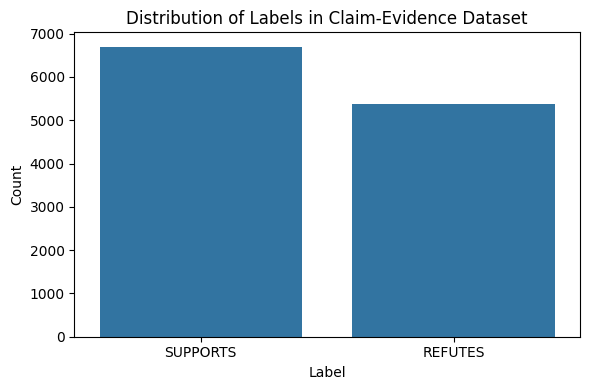

In [21]:
label_counts = Counter(df_all["label"])

plt.figure(figsize=(6, 4))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.title("Distribution of Labels in Claim-Evidence Dataset")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

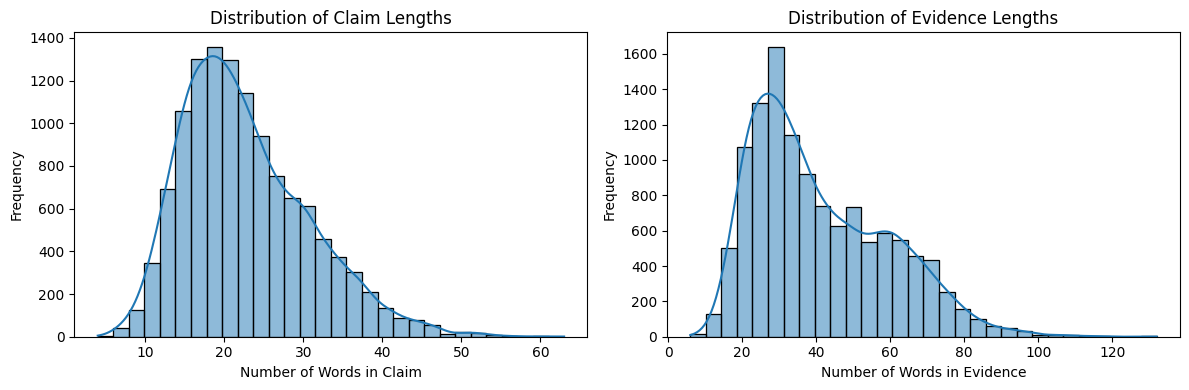

In [24]:
# Thêm độ dài (số từ) của claim và evidence
df_all["claim_length"] = df_all["claim"].apply(lambda x: len(x.split()))
df_all["evidence_length"] = df_all["evidence"].apply(lambda x: len(x.split()))

# Tạo các biểu đồ phân phối độ dài
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df_all["claim_length"], bins=30, kde=True, ax=axs[0])
axs[0].set_title("Distribution of Claim Lengths")
axs[0].set_xlabel("Number of Words in Claim")
axs[0].set_ylabel("Frequency")

sns.histplot(df_all["evidence_length"], bins=30, kde=True, ax=axs[1])
axs[1].set_title("Distribution of Evidence Lengths")
axs[1].set_xlabel("Number of Words in Evidence")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

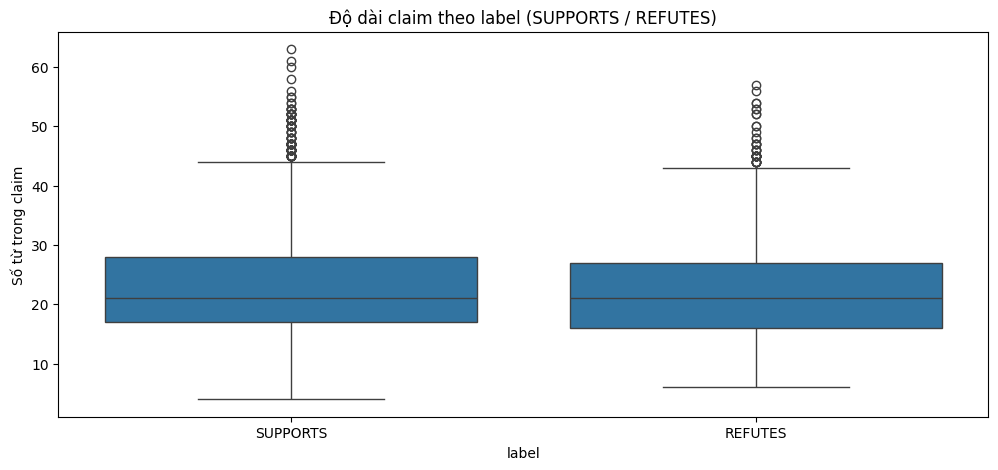

In [26]:
# So sánh độ dài claim/evidence theo label (SUPPORTS vs REFUTES)
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_all, x="label", y="claim_length")
plt.title("Độ dài claim theo label (SUPPORTS / REFUTES)")
plt.ylabel("Số từ trong claim")
plt.show()

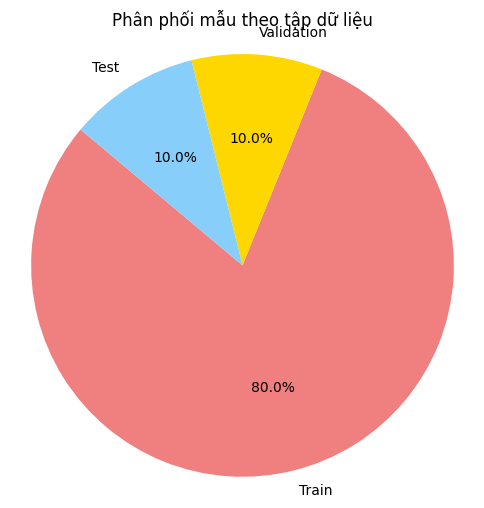

In [28]:
labels = ['Train', 'Validation', 'Test']
sizes = [len(train), len(val), len(test)]
colors = ['lightcoral', 'gold', 'lightskyblue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối mẫu theo tập dữ liệu')
plt.axis('equal')
plt.show()

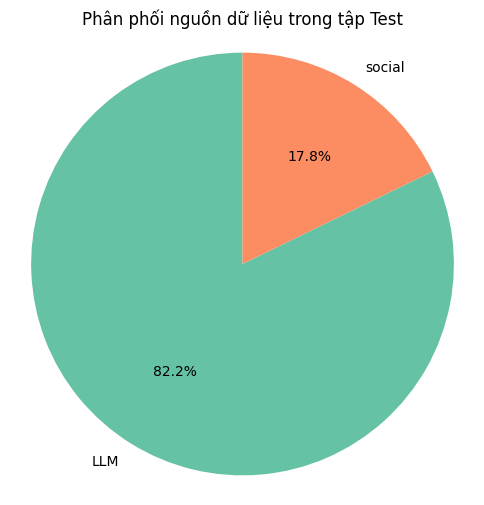

In [30]:
source_counts = test['source'].value_counts()
labels = source_counts.index.tolist()
sizes = source_counts.values.tolist()
colors = ['#66c2a5', '#fc8d62']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Phân phối nguồn dữ liệu trong tập Test')
plt.axis('equal')
plt.show()

## Xuất các file dữ liệu

In [40]:
# Xuất file data đầy đủ (merge LLM + social) có cột source
def export_full_data(df, filename="data_full.json"):
    records = df_all.to_dict(orient="records")
    with open(filename, "w", encoding="utf-8") as f:
        json.dump(records, f, ensure_ascii=False, indent=2)

In [41]:
export_full_data(df_all, "data_full.json")

In [42]:
# Xuất file train/val/test chỉ giữ claim, evidence, label (bỏ source)
def export_split_data(df, filename):
    df_for_training = df.drop(columns=["source"])
    records = df_for_training.to_dict(orient="records")
    with open(filename, "w", encoding="utf-8") as f:
        json.dump(records, f, ensure_ascii=False, indent=2)

In [43]:
# Xuất file train/val/test
export_split_data(train, "train.json")
export_split_data(val, "val.json")
export_split_data(test, "test.json")